In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import wget

%matplotlib inline

Data Cleaning and Preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-06-trees/CreditScoring.csv'
wget.download(data)

'CreditScoring (1).csv'

In [3]:
df = pd.read_csv(data) 
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()
df.nunique()

status          3
seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        353
assets        160
debt          183
amount        285
price        1419
dtype: int64

In [5]:
df.value_counts()
# we can see from here that status, home, marital, records, and job are categorical variables

status  seniority  home  time  age  marital  records  job  expenses  income  assets    debt      amount  price
1       4          2     60    37   2        1        3    35        128     18000     0         800     1560     2
2       5          2     60    36   2        1        3    90        62      3000      0         650     1295     2
        43         2     60    57   2        2        1    45        283     8000      0         900     1168     1
0       10         3     60    25   1        1        1    35        148     3000      0         1500    1888     1
1       0          1     12    22   1        1        3    38        34      0         0         700     1665     1
                                                                                                                 ..
2       33         2     48    59   2        2        1    45        114     10000     0         1200    1420     1
        35         2     36    51   2        1        3    45        0       

In [6]:
df.status.describe()

count    4455.000000
mean        1.281257
std         0.450162
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: status, dtype: float64

We need to convert the categorical variables from numbers to words using map

In [7]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unknown'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [8]:
df.value_counts()


status   seniority  home  time  age  marital  records  job  expenses  income    assets    debt      amount  price
default  5          2     60    36   2        1        3    90        62        3000      0         650     1295     2
ok       4          2     60    37   2        1        3    35        128       18000     0         800     1560     2
unknown  10         3     60    25   1        1        1    35        148       3000      0         1500    1888     1
default  0          0     48    23   2        1        2    45        26        99999999  99999999  1350    1562     1
                                37   1        1        0    35        99999999  99999999  99999999  1500    1850     1
                                                                                                                    ..
ok       45         2     30    64   2        1        3    45        157       20000     0         1000    1588     1
                    6     48    62   2        1      

In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unknown'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unknown'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unknown'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unknown'
}

df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [11]:
df.income.max()

np.int64(99999999)

In [12]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [13]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [14]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [15]:
df.status.value_counts()

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

In [16]:
# we have just one "unknown" for the status. this can affect our model when training. wehave to remove it from the dataset
df[df.status == "unknown"]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3309,unknown,10,private,60,25,single,no,fixed,35,148.0,3000.0,0.0,1500,1888


In [17]:
# we take out the "unknown" status and reset the index as a new dataframe
df = df[df.status != "unknown"].reset_index(drop=True)

Now we're ready to prepare the data for training:
- First, do train-validation-test split
- Then, apply one-hot encoding to categorical features and get the feature matrix

In [18]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

del df_train['status']
del df_val['status']
del df_test['status']

In [21]:
len(df), len(df_train_full), len(df_train), len(df_val), len(df_test)

(4454, 3563, 2672, 891, 891)

## Decision Tree

In [22]:
def client_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [23]:
xi = df_train.iloc[0].to_dict()

In [24]:
client_risk(xi)

'ok'

Training Decision Tree with Scikit Learn

In [25]:
# we can learn these rules from the data using decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer   # because we have categorical variables
from sklearn.metrics import roc_auc_score

In [26]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [27]:
X_train
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unknown', 'income', 'job=fixed',
       'job=freelance', 'job=others', 'job=partime', 'job=unknown',
       'marital=divorced', 'marital=married', 'marital=separated',
       'marital=single', 'marital=unknown', 'marital=widow', 'price',
       'records=no', 'records=yes', 'seniority', 'time'], dtype=object)

In [28]:
# To train our decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
# y_pred = dt.predict_proba(X_val)      #This will return a 2d array
y_pred = dt.predict_proba(X_val)[:, 1]
      
roc_auc_score(y_val, y_pred)

0.6440507616671913

In [30]:
# using training dataset for computing roc auc score
y_pred = dt.predict_proba(X_train)[:, 1]
      
roc_auc_score(y_train, y_pred)

# we notice the problem of overfitting where our model gives a very high accuracy in 
# computing the roc auc for training dataset but very low for validation dataset

1.0

To solve the case of overfitting, we set max_depth

In [31]:
# we need to trim out the noise by setting max_depth
# The max depth will set how deep the tree will go from the root node

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 0.705
val auc: 0.669


In [32]:
from sklearn.tree import export_text


print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



Decision Tree Algorithm Parameter Tuning
- Selecting max_depth
- Selecting min_samples_leaf

In [33]:
DecisionTreeClassifier()

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
# Lets check what max_depth should be enough for our tree classification
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print(f"{d} -> {auc: .3f}")
# The best depth is between 4 to 6. 
# we now have to consider min_sample_leaf

1 ->  0.606
2 ->  0.669
3 ->  0.739
4 ->  0.761
5 ->  0.766
6 ->  0.761
10 ->  0.695
15 ->  0.665
20 ->  0.667
None ->  0.652


In [35]:
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        print(f"{d}, {s} -> {auc: .3f}")

4, 1 ->  0.761
4, 2 ->  0.761
4, 5 ->  0.761
4, 10 ->  0.761
4, 15 ->  0.764
4, 20 ->  0.761
4, 100 ->  0.756
4, 200 ->  0.747
4, 500 ->  0.680
5, 1 ->  0.767
5, 2 ->  0.766
5, 5 ->  0.768
5, 10 ->  0.762
5, 15 ->  0.772
5, 20 ->  0.774
5, 100 ->  0.763
5, 200 ->  0.759
5, 500 ->  0.680
6, 1 ->  0.751
6, 2 ->  0.763
6, 5 ->  0.762
6, 10 ->  0.778
6, 15 ->  0.785
6, 20 ->  0.774
6, 100 ->  0.776
6, 200 ->  0.768
6, 500 ->  0.680


In [36]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))
        # print(f"{d}, {s} -> {auc: .3f}")
        # print(scores)

In [37]:
columns = ["max_depth", "min_samples_leaf", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [38]:
df_scores.sort_values(by="auc", ascending=False).head()

,max_depth,min_samples_leaf,auc
22,6,15,0.785319
21,6,10,0.778299
24,6,100,0.776434
23,6,20,0.774279
14,5,20,0.773537


In [39]:
df_scores_pivot = df_scores.pivot(index="min_samples_leaf", columns="max_depth", values="auc")
df_scores_pivot.round(3)

max_depth,4,5,6
min_samples_leaf,,,
1,0.761,0.766,0.750
2,0.761,0.767,0.754
5,0.761,0.768,0.759
10,0.761,0.762,0.778
15,0.764,0.772,0.785
20,0.761,0.774,0.774
100,0.756,0.763,0.776
200,0.747,0.759,0.768
500,0.680,0.680,0.680


<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

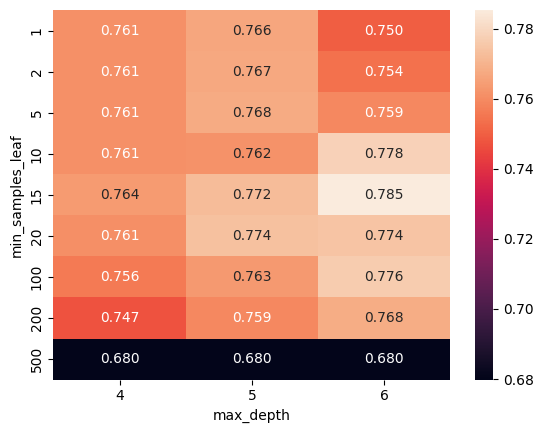

In [40]:
import seaborn as sns

sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

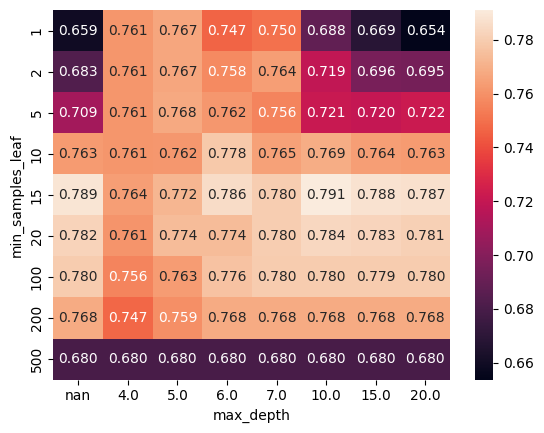

In [41]:
# Say we consider a wider range of max_depth
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index="min_samples_leaf", columns="max_depth", values="auc")

sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

# we can see that we get a higher auc with max_depth of 10 and min_samples_leaf of 15
# we then use both parameters to train our model

In [42]:
dt = DecisionTreeClassifier(min_samples_leaf=15, max_depth=6)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Ensemble Learning and Random Forest
- Board of Experts
- Ensembling models
- Random Forest - ensembling decision trees
- Tuning random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators is the number of models you want to train. default values is 100
# each tree gets a different subset of features 

rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.7744726453706618

In [44]:
# This value will keep changing when we retrain the model. This is because of the reandomisation when training the model
# we use "random_state" to keep the value fixed when training
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

In [45]:
# what if we increase our number of models (n_estimators)
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [46]:
df_scores = pd.DataFrame(scores, columns=["n_estimators", "auc"])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


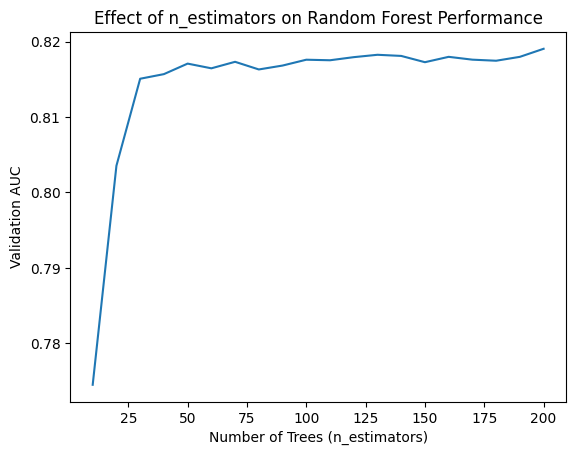

In [47]:
plt.plot(df_scores.n_estimators, df_scores.auc)

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Validation AUC")
plt.title("Effect of n_estimators on Random Forest Performance")
plt.show()

In [48]:
# Lets tune our random forest model with max_depth and min_samples_leaf parameter
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [49]:
columns = ["max_depth", "n_estimators", "auc"]

df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


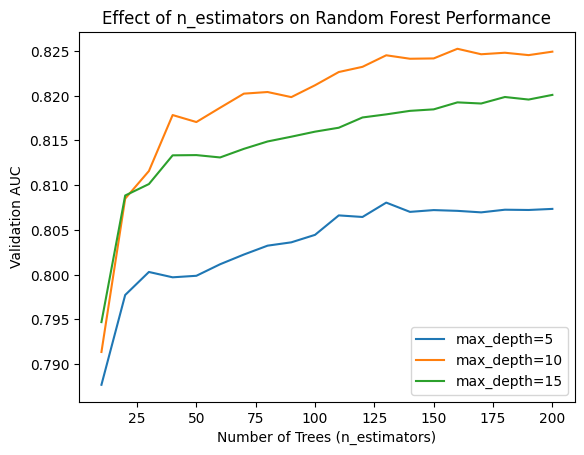

In [ ]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Validation AUC")
plt.title("Effect of n_estimators on Random Forest Performance")

plt.legend()
plt.show()

# This shows that max_depth matters and the best max_depth is 10

In [56]:
max_depth = 10
# what is the best min_samples_leaf

In [61]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, min_samples_leaf=s,
                                    max_depth=max_depth, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [62]:
columns = ["min_samples_leaf", "n_estimators", "auc"]

df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


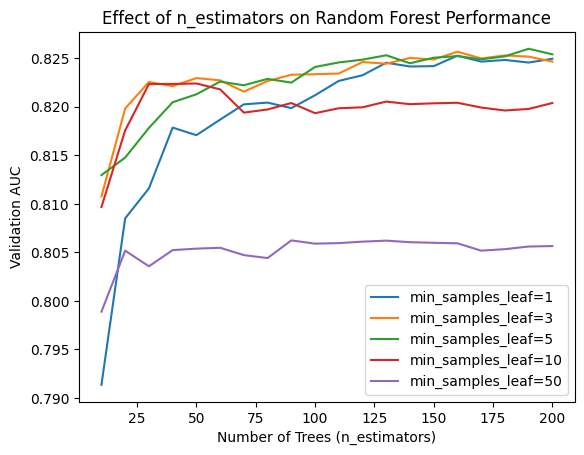

In [63]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"min_samples_leaf={s}")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Validation AUC")
plt.title("Effect of n_estimators on Random Forest Performance")

plt.legend()
plt.show()


In [64]:
min_samples_leaf = [1, 3, 5, 10, 15]
colors = ["green", "red", "blue", "yellow", "black"]
list(zip(min_samples_leaf, colors))

[(1, 'green'), (3, 'red'), (5, 'blue'), (10, 'yellow'), (15, 'black')]

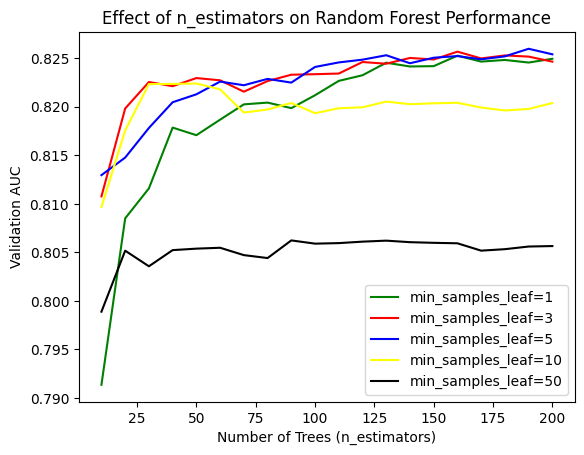

In [ ]:
min_samples_leaf = [1, 3, 5, 10, 50]
colors = ["green", "red", "blue", "yellow", "black"]

for s, colors in zip(min_samples_leaf, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, 
             label=f"min_samples_leaf={s}", color=colors)

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Validation AUC")
plt.title("Effect of n_estimators on Random Forest Performance")

plt.legend()
plt.show()

# min_samples_leaf = 3 is the best value we are using

In [67]:
# We will train our final random tree using the best max_depth and min_samples_leaf

max_depth = 10
min_samples_leaf = 3

In [70]:
# n_jobs: the number of jobs to run in parallel.
# n_jobs=-1: this allows the model to be trained using maximum cpu available

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=min_samples_leaf,
                                    max_depth=max_depth, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Gradient Boosting
- Gradient Boosting vs random forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing xgboost's monitoring output